# Medical Insurance Cost

Hospital ABC, a leading healthcare provider, aims to optimize its resource allocation and improve
patient care by understanding the factors influencing medical costs for its patients. To achieve
this, Hospital ABC has collected a comprehensive dataset containing information about patients'
demographics, lifestyle, health status, and medical expenses etc. The dataset includes attributes
such as age, gender, BMI, smoking status, region, as well as additional information like
occupation, exercise frequency, chronic conditions, and more.

GOALS

Predict medical costs for patients based on demographic factors, lifestyle-related information, health status,
insurance plan type, family medical history, distance to the nearest hospital, and primary care physician visits.

    1. Explore the relationship between demographic factors (age, gender, region),
       lifestyle-related information (BMI, smoking status, exercise frequency),and 
       health status(chronic conditions,mental    health)with medical costs.
    2. Investigate the impact of insurance plan type, income level, and family medical history on healthcare expenses.
    3. Analyze the influence of distance to the nearest hospital and frequency of primary care physician visits on
       medical charges.
    4. Develop a predictive model to estimate medical costs for individual patients based on the collected features.
    5. Evaluate the performance of the predictive model using appropriate metrics such as mean absolute error or 
       root mean squared error.
    6. Interpret the results and provide actionable insights for Hospital ABC to optimize resource allocation, 
       healthcare planning, and patient support services.

# Expected Outcome

The project aims to deliver a predictive model that can accurately estimate medical costs for patients based on their demographic, lifestyle, health status, and other relevant factors. Additionally, the project will provide actionable insights for Hospital ABC to improve resource allocation, healthcare planning, and patient support services, ultimately enhancing the quality and accessibility of healthcare services for its patients.

# Data Preprocessing

In [4]:
#Import basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
import pickle
from tkinter import *
import joblib

In [5]:
#Read the data
df = pd.read_csv('medical data - Sheet1.csv')

Note : In Python, pd.read_csv() is a function provided by the Pandas library used to read data from a CSV (Comma Separated Values) file into a Pandas DataFrame.

In [6]:
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,62,M,23.39610,4,Yes,East,White Collar,Rarely,Heart Disease,HMO,...,Easy,High,NaN,NaN,NaN,Other,NaN,1.0,18.0,7604.947
1,65,M,22.03668,4,Yes,North,Retired,2 times/week,Heart Disease,HDHP,...,Easy,Low,Moderate,Yes,Moderate,Asthma,NaN,0.0,1.0,7067.338
2,71,M,23.03985,1,No,North,Retired,Rarely,NaN,HMO,...,Moderate,High,NaN,NaN,Moderate,Obesity,Yes,2.0,15.0,4478.128
3,18,F,24.82284,0,Yes,North,Self Employed,Daily,Arthritis,PPO,...,NaN,NaN,NaN,NaN,High,Cancer,No,3.0,9.0,12944.880
4,21,M,23.44420,1,No,North,Professional,Daily,Arthritis,HDHP,...,Easy,Low,NaN,Yes,Moderate,Other,NaN,0.0,17.0,8275.411


Note: 'df.head()' will display the first few rows of your DataFrame df. By default, it will display the first five rows,

# Features Explanation

● Age: The age of the patient in years.\
● Sex: The gender of the patient, either 'M' (male) or 'F' (female).\
● BMI (Body Mass Index): A numerical value representing the body mass index of the
patient, which is calculated using their weight and height.\
● Children: The number of children the patient has.\
● Smoker: Indicates whether the patient is a smoker or not, with values 'Yes' or 'No'.\
● Region: The geographic region where the patient resides, with values such as 'North',
'South', 'East', or 'West'.\
● Occupation: The occupation of the patient, which can be 'White Collar', 'Blue Collar',
'Professional', 'Student', 'Retired', or 'Self Employed'.\
● Exercise_Frequency: The frequency of exercise for the patient, such as 'Daily', '2
times/week', '3 times/week', 'Once a week', or 'Rarely'.\
● Chronic_Conditions: Any chronic conditions the patient may have, such as 'None',
'Diabetes', 'High Blood Pressure', 'Heart Disease', or 'Arthritis'.\
● Insurance_Plan_Type: The type of insurance plan the patient has, which can be 'PPO',
'HMO', or 'HDHP'.\
● Marital_Status: The marital status of the patient, either 'Married' or 'Single'.\
● Distance_to_Nearest_Hospital: The distance to the nearest hospital from the patient's
residence.\
● Income_Level: The income level of the patient, categorized as 'Low', 'Medium', or 'High'.\
● Family_Medical_History: Indicates whether the patient has a family medical history or not,
with values 'Yes' or 'No'.\
● Primary_Care_Physician_Visits: The number of visits the patient makes to their primary
care physician.\
● Mental_Health_Status: The mental health status of the patient, categorized as 'Poor', 'Fair',
'Good', or 'Excellent'.\
● Prescription_Medication_Usage: Indicates whether the patient uses prescription
medication or not, with values 'Yes' or 'No'.\
● Employment_Status: The employment status of the patient, which can be 'Employed',
'Unemployed', 'Self Employed', or missing (NaN).\
● Education_Level: The highest level of education attained by the patient, such as 'High
School', "Bachelor's Degree", "Master's Degree", 'PhD', or missing (NaN).\
● Dietary_Habits: Describes the patient's dietary habits, such as 'Vegetarian',
'Non-Vegetarian', 'Vegan', or missing (NaN).\
● Alcohol_Consumption: Indicates the frequency of alcohol consumption by the patient,
such as 'Never', 'Occasionally', 'Regularly', or missing (NaN).\
● Sleep_Quality: Subjective assessment of the patient's sleep quality, categorized as 'Poor',
'Fair', 'Good', 'Excellent', or missing (NaN).\
● Stress_Level: Measures the perceived stress level of the patient, categorized as 'Low',
'Moderate', 'High', or missing (NaN).\
● Medication_Adherence: Indicates the patient's adherence to prescribed medications, with
values 'Yes', 'No', or missing (NaN).\
● Physical_Activity: Additional information on the patient's physical activity level, such as
participation in sports or specific exercise routines, categorized as 'Low', 'Moderate',
'High', or missing (NaN).\
● Access_to_Healthcare: Describes the ease of access to healthcare services for the
patient, categorized as 'Easy', 'Moderate', 'Difficult', or missing (NaN).\
● Social_Support: Measures the level of social support available to the patient, categorized
as 'Low', 'Moderate', 'High', or missing (NaN).\
● Environmental_Factors: Any environmental factors that may impact the patient's health or
healthcare expenses, categorized as 'Low', 'Moderate', 'High', or missing (NaN).\
● Genetic_Predisposition: Indicates whether the patient has a known genetic predisposition
to certain health conditions, with values 'Yes', 'No', or missing (NaN).\
● Health_Literacy_Level: Measures the patient's level of health literacy, categorized as
'Low', 'Moderate', 'High', or missing (NaN).\
● Comorbidities: Additional chronic conditions or comorbidities not captured in the "Chronic
Conditions" feature, such as 'Asthma', 'Allergies', 'Cancer', 'Obesity', 'Hypertension', 'Other',
or missing (NaN).\
● Access_to_Telemedicine: Indicates whether the patient has access to telemedicine
services for remote consultations, with values 'Yes', 'No', or missing (NaN).\
● Emergency_Room_Visits: The frequency of visits to the emergency room by the patient.\
● Healthcare_Utilization: Measures the overall utilization of healthcare services by the
patient, including hospital admissions, specialist consultations, etc.\
● Charges: The medical insurance charges incurred by the patient.


Note : Features are fundamental components of data analysis and machine learning models. Understanding the nature, importance, and characteristics of features is essential for building effective predictive models and deriving meaningful insights from data.

# Data Analysis

In [7]:
# Number of rows and columns
df.shape

(1000, 35)

Note : The Dataset contains 1000 rows and 35 columns

In [8]:
# Getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1000 non-null   int64  
 1   Sex                            1000 non-null   object 
 2   BMI                            984 non-null    float64
 3   Children                       1000 non-null   int64  
 4   Smoker                         999 non-null    object 
 5   Region                         999 non-null    object 
 6   Occupation                     1000 non-null   object 
 7   Exercise_Frequency             1000 non-null   object 
 8   Chronic_Conditions             796 non-null    object 
 9   Insurance_Plan_Type            1000 non-null   object 
 10  Marital_Status                 1000 non-null   object 
 11  Distance_to_Nearest_Hospital   994 non-null    float64
 12  Income_Level                   1000 non-null   ob

Note :The 'df.info()' method in Pandas provides a concise summary of a DataFrame, including information about the DataFrame's structure, data types, memory usage, and presence of missing values.\
     This method is often used during the initial exploration of a dataset to gain insight into its characteristics.\
     The Dataset contains numerical values and categorical values.\
     The memory usage of the DataFrame is approximately 273.6 KB(kilobytes).

# Data Preprocessing


# 1.Handling missing values:

To check number of null values present in each column

In [9]:
df.isnull().sum()

Age                                0
Sex                                0
BMI                               16
Children                           0
Smoker                             1
Region                             1
Occupation                         0
Exercise_Frequency                 0
Chronic_Conditions               204
Insurance_Plan_Type                0
Marital_Status                     0
Distance_to_Nearest_Hospital       6
Income_Level                       0
Family_Medical_History             0
Primary_Care_Physician_Visits      0
Mental_Health_Status               0
Prescription_Medication_Usage      0
Employment_Status                252
Education_Level                  198
Dietary_Habits                   241
Alcohol_Consumption              240
Sleep_Quality                    214
Stress_Level                     245
Medication_Adherence             311
Physical_Activity                254
Access_to_Healthcare             264
Social_Support                   230
E

Note : This information can be helpful for identifying columns with missing data and deciding how to handle them, whether by imputation, deletion, or other methods.\
dtype: int64 simply tells us that the values in the Series are integer numbers stored with 64 bits of precision.

# 2.Dealing with Duplicate Data

Detect and remove duplicate records from the dataset.

In [10]:
df.duplicated().sum()

0

Here, output value is 0.That is, there is no duplicates

# 3. Remove Unwanted Columns

In [11]:
 
df=df.drop(['Children','Occupation','Marital_Status','Prescription_Medication_Usage','Employment_Status',
                   'Education_Level','Dietary_Habits','Alcohol_Consumption','Sleep_Quality','Stress_Level',
                   'Access_to_Healthcare','Medication_Adherence','Physical_Activity','Social_Support',
                   'Genetic_Predisposition','Health_Literacy_Level','Comorbidities','Access_to_Telemedicine',
                  'Emergency_Room_Visits','Healthcare_Utilization'] ,axis =1)


df

,Age,Sex,BMI,Smoker,Region,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,Distance_to_Nearest_Hospital,Income_Level,Family_Medical_History,Primary_Care_Physician_Visits,Mental_Health_Status,Environmental_Factors,Charges
0,62,M,23.39610,Yes,East,Rarely,Heart Disease,HMO,5.112872,Low,Yes,9,Poor,NaN,7604.947
1,65,M,22.03668,Yes,North,2 times/week,Heart Disease,HDHP,19.006750,High,No,3,Poor,Moderate,7067.338
2,71,M,23.03985,No,North,Rarely,NaN,HMO,9.624294,Medium,Yes,9,Poor,NaN,4478.128
3,18,F,24.82284,Yes,North,Daily,Arthritis,PPO,11.869340,Medium,Yes,7,Poor,NaN,12944.880
4,21,M,23.44420,No,North,Daily,Arthritis,HDHP,15.146110,Medium,No,6,Good,NaN,8275.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,75,M,24.18366,No,West,Daily,NaN,PPO,5.041508,Low,No,1,Good,Low,7344.957
996,24,F,36.91005,No,East,3 times/week,Arthritis,HDHP,11.672830,Medium,Yes,1,Poor,Low,13072.180
997,37,M,25.34770,Yes,North,3 times/week,High Blood Pressure,HMO,15.267760,Low,No,9,Good,Low,10463.350
998,52,F,26.18630,No,West,Once a week,High Blood Pressure,HMO,11.871490,Medium,No,8,Good,Moderate,7296.749


 Note : drop() method is used to remove unwanted columns from a DataFrame in Pandas. 

In [12]:
df.describe()

,Age,BMI,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Charges
count,1000.000000,984.000000,994.000000,1000.000000,1000.000000
mean,48.167000,25.096119,10.623046,4.964000,10149.250960
std,18.009427,4.929889,5.449890,2.599897,3006.201159
min,18.000000,8.889366,1.000381,1.000000,1910.048000
25%,33.000000,21.891128,5.893609,3.000000,8193.242000
50%,48.000000,25.270985,10.953870,5.000000,10228.765000
75%,64.000000,28.176527,15.288303,7.000000,12157.125000
max,79.000000,39.558080,19.996930,9.000000,19139.980000


The df.describe() method in Pandas is used to generate descriptive statistics of the numerical columns in a DataFrame.\
It provides summary statistics such as count, mean, standard deviation, minimum, quartiles, and maximum values for each numerical column.\

The df.describe() method in Pandas is used to generate descriptive statistics of the numerical columns in a DataFrame. It provides summary statistics such as count, mean, standard deviation, minimum, quartiles, and maximum values for each numerical column.

count: The number of non-null values in each column.\
mean: The mean (average) value of each column.\
std: The standard deviation, which measures the spread of values around the mean.\
min: The minimum value in each column.\
25%, 50%, 75%: The quartiles, which divide the data into four equal parts. These are also known as the 25th, 50th (median), and 75th percentiles.\
max: The maximum value in each column.\

These percentiles are useful for understanding the distribution of data, identifying outliers, and assessing variability. In machine learning, they are often used in exploratory data analysis (EDA) to gain insights into the dataset's characteristics before building models or making predictions.

In [13]:
df.isnull().sum()

Age                                0
Sex                                0
BMI                               16
Smoker                             1
Region                             1
Exercise_Frequency                 0
Chronic_Conditions               204
Insurance_Plan_Type                0
Distance_to_Nearest_Hospital       6
Income_Level                       0
Family_Medical_History             0
Primary_Care_Physician_Visits      0
Mental_Health_Status               0
Environmental_Factors            264
Charges                            0
dtype: int64

Here, null values present in the columns BMI, Chronic_Conditions,Environmental_Factors .

# 4. Label Encoding

# 4.1 Skewness

Skewness tells us about the shape of the distribution of data points in a dataset.
3 Types:
Symmetric,Positively Skewed (Right-skewed),Negatively Skewed (Left-skewed).

In [14]:
numerical_data=df.select_dtypes(include=['number'])
skewness=numerical_data.skew()
print(skewness)

Age                             -0.007953
BMI                             -0.095467
Distance_to_Nearest_Hospital    -0.063585
Primary_Care_Physician_Visits   -0.007686
Charges                         -0.058278
dtype: float64


In [15]:
for feature,skew in skewness.items():
    skew_name="Highly negatively skewed" if skew < -1 else ("right-skewed" if skew > 0.01 else "approximately symmetric")
    print(f"{feature}: Skewness = {skew:.2f} ({skew_name})")

Age: Skewness = -0.01 (approximately symmetric)
BMI: Skewness = -0.10 (approximately symmetric)
Distance_to_Nearest_Hospital: Skewness = -0.06 (approximately symmetric)
Primary_Care_Physician_Visits: Skewness = -0.01 (approximately symmetric)
Charges: Skewness = -0.06 (approximately symmetric)


In cases where the skewness is close to zero and the distribution is approximately symmetric, the choice between filling with mean or median might not have a significant impact on the results. Here we use median for filling missing values.

In [16]:
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df['Distance_to_Nearest_Hospital'].fillna(df['Distance_to_Nearest_Hospital'].median(),inplace=True)
df

,Age,Sex,BMI,Smoker,Region,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,Distance_to_Nearest_Hospital,Income_Level,Family_Medical_History,Primary_Care_Physician_Visits,Mental_Health_Status,Environmental_Factors,Charges
0,62,M,23.39610,Yes,East,Rarely,Heart Disease,HMO,5.112872,Low,Yes,9,Poor,NaN,7604.947
1,65,M,22.03668,Yes,North,2 times/week,Heart Disease,HDHP,19.006750,High,No,3,Poor,Moderate,7067.338
2,71,M,23.03985,No,North,Rarely,NaN,HMO,9.624294,Medium,Yes,9,Poor,NaN,4478.128
3,18,F,24.82284,Yes,North,Daily,Arthritis,PPO,11.869340,Medium,Yes,7,Poor,NaN,12944.880
4,21,M,23.44420,No,North,Daily,Arthritis,HDHP,15.146110,Medium,No,6,Good,NaN,8275.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,75,M,24.18366,No,West,Daily,NaN,PPO,5.041508,Low,No,1,Good,Low,7344.957
996,24,F,36.91005,No,East,3 times/week,Arthritis,HDHP,11.672830,Medium,Yes,1,Poor,Low,13072.180
997,37,M,25.34770,Yes,North,3 times/week,High Blood Pressure,HMO,15.267760,Low,No,9,Good,Low,10463.350
998,52,F,26.18630,No,West,Once a week,High Blood Pressure,HMO,11.871490,Medium,No,8,Good,Moderate,7296.749


Fills missing values in the 'BMI' column with the median value of the 'BMI' column. The inplace=True parameter modifies the 'BMI' column in the original DataFrame df without creating a new DataFrame.\
Fills missing values in the 'Distance_to_Nearest_Hospital' column with the median value of the 'Distance_to_Nearest_Hospital' column.

In [17]:
#Filling with Mode Use for categorical variables
categorical_columns=df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    mode_value=df[column].mode()[0]
    df[column].fillna(mode_value,inplace=True)
df

,Age,Sex,BMI,Smoker,Region,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,Distance_to_Nearest_Hospital,Income_Level,Family_Medical_History,Primary_Care_Physician_Visits,Mental_Health_Status,Environmental_Factors,Charges
0,62,M,23.39610,Yes,East,Rarely,Heart Disease,HMO,5.112872,Low,Yes,9,Poor,High,7604.947
1,65,M,22.03668,Yes,North,2 times/week,Heart Disease,HDHP,19.006750,High,No,3,Poor,Moderate,7067.338
2,71,M,23.03985,No,North,Rarely,Heart Disease,HMO,9.624294,Medium,Yes,9,Poor,High,4478.128
3,18,F,24.82284,Yes,North,Daily,Arthritis,PPO,11.869340,Medium,Yes,7,Poor,High,12944.880
4,21,M,23.44420,No,North,Daily,Arthritis,HDHP,15.146110,Medium,No,6,Good,High,8275.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,75,M,24.18366,No,West,Daily,Heart Disease,PPO,5.041508,Low,No,1,Good,Low,7344.957
996,24,F,36.91005,No,East,3 times/week,Arthritis,HDHP,11.672830,Medium,Yes,1,Poor,Low,13072.180
997,37,M,25.34770,Yes,North,3 times/week,High Blood Pressure,HMO,15.267760,Low,No,9,Good,Low,10463.350
998,52,F,26.18630,No,West,Once a week,High Blood Pressure,HMO,11.871490,Medium,No,8,Good,Moderate,7296.749


Missing values in each categorical column of your DataFrame df will be replaced with the mode value of that column. This is a common strategy for handling missing values in categorical data, as it preserves the distribution of categorical values in the dataset.[0] is used to select the first mode value.

In [18]:
df.isnull().sum()

Age                              0
Sex                              0
BMI                              0
Smoker                           0
Region                           0
Exercise_Frequency               0
Chronic_Conditions               0
Insurance_Plan_Type              0
Distance_to_Nearest_Hospital     0
Income_Level                     0
Family_Medical_History           0
Primary_Care_Physician_Visits    0
Mental_Health_Status             0
Environmental_Factors            0
Charges                          0
dtype: int64

Note: From it is clear that all missing vaalues are filled

In [19]:
import pandas as pd
# Select columns with 'object' data type
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
# Print categorical columns
print("Categorical Features:")
for col in categorical_columns:
    print("", col)

Categorical Features:
 Sex
 Smoker
 Region
 Exercise_Frequency
 Chronic_Conditions
 Insurance_Plan_Type
 Income_Level
 Family_Medical_History
 Mental_Health_Status
 Environmental_Factors


# 4.2 Label Encoding

Label encoding is a technique used to convert categorical data into numerical format. In label encoding, each unique category or value in a categorical variable is assigned an integer label. This is done by mapping each category to a unique integer.Label encoding can be implemented using libraries like scikit-learn in Python. The 'LabelEncoder' class from scikit-learn is commonly used for this purpose.

In [20]:
categorical_cols = df.select_dtypes(include =['object']).columns
label_encoder=LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
df

,Age,Sex,BMI,Smoker,Region,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,Distance_to_Nearest_Hospital,Income_Level,Family_Medical_History,Primary_Care_Physician_Visits,Mental_Health_Status,Environmental_Factors,Charges
0,62,1,23.39610,1,0,4,2,1,5.112872,1,1,9,3,0,7604.947
1,65,1,22.03668,1,1,0,2,0,19.006750,0,0,3,3,2,7067.338
2,71,1,23.03985,0,1,4,2,1,9.624294,2,1,9,3,0,4478.128
3,18,0,24.82284,1,1,2,0,2,11.869340,2,1,7,3,0,12944.880
4,21,1,23.44420,0,1,2,0,0,15.146110,2,0,6,2,0,8275.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,75,1,24.18366,0,3,2,2,2,5.041508,1,0,1,2,1,7344.957
996,24,0,36.91005,0,0,1,0,0,11.672830,2,1,1,3,1,13072.180
997,37,1,25.34770,1,1,1,3,1,15.267760,1,0,9,2,1,10463.350
998,52,0,26.18630,0,3,3,3,1,11.871490,2,0,8,2,2,7296.749


Note :\
label_encoder = LabelEncoder(): This creates an instance of the LabelEncoder class from scikit-learn, which will be used to transform categorical values into numerical labels.\
df[col] = label_encoder.fit_transform(df[col]): For each column, it applies the fit_transform method of the LabelEncoder to transform the categorical values into numerical labels. The transformed labels are then assigned back to the corresponding column in the DataFrame df.

# 4.3 Correlation Matrix

In [21]:
correlation_matrix = df.corr()
correlation_matrix

,Age,Sex,BMI,Smoker,Region,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,Distance_to_Nearest_Hospital,Income_Level,Family_Medical_History,Primary_Care_Physician_Visits,Mental_Health_Status,Environmental_Factors,Charges
Age,1.000000,0.029660,-0.006389,-0.016485,-0.023842,-0.012791,-0.089965,-0.003517,0.006051,-0.011100,-0.049947,0.005131,-0.012894,-0.004620,-0.010229
Sex,0.029660,1.000000,-0.002836,-0.005387,-0.009908,0.013857,0.022594,0.006104,0.034662,0.059811,0.060364,0.014241,0.023304,0.033938,0.000754
BMI,-0.006389,-0.002836,1.000000,0.002861,0.004784,-0.000206,0.008577,0.023075,0.002742,0.041956,-0.001719,0.079381,0.023843,0.019305,0.060152
Smoker,-0.016485,-0.005387,0.002861,1.000000,-0.012958,-0.008595,0.077607,-0.049795,0.034804,-0.035279,0.013740,0.060352,0.029368,-0.021538,0.008253
Region,-0.023842,-0.009908,0.004784,-0.012958,1.000000,-0.012569,-0.049927,-0.006223,0.020550,-0.021323,0.025379,-0.021114,0.010021,0.046977,0.001577
Exercise_Frequency,-0.012791,0.013857,-0.000206,-0.008595,-0.012569,1.000000,-0.050223,-0.027005,-0.035204,-0.017427,0.027125,0.008118,0.033089,0.023600,0.011819
Chronic_Conditions,-0.089965,0.022594,0.008577,0.077607,-0.049927,-0.050223,1.000000,-0.028236,-0.001281,0.007613,-0.009117,0.020387,0.038060,-0.038540,0.020400
Insurance_Plan_Type,-0.003517,0.006104,0.023075,-0.049795,-0.006223,-0.027005,-0.028236,1.000000,0.006883,-0.025394,-0.023074,0.062596,-0.012881,-0.048922,0.030828
Distance_to_Nearest_Hospital,0.006051,0.034662,0.002742,0.034804,0.020550,-0.035204,-0.001281,0.006883,1.000000,-0.010063,-0.007678,0.050181,-0.004191,0.024883,-0.038046
Income_Level,-0.011100,0.059811,0.041956,-0.035279,-0.021323,-0.017427,0.007613,-0.025394,-0.010063,1.000000,0.003948,0.003029,0.063777,0.010862,-0.010638


A correlation matrix is a table that shows the correlation coefficients between multiple variables in a dataset. Each cell in the table represents the correlation coefficient between two variables. Typically, correlation matrices are square, with variables both as rows and columns.Correlation coefficients quantify the strength and direction of the linear relationship between two variables. The correlation coefficient can range from -1 to 1,A correlation coefficient of 1 indicates a perfect positive linear relationship.
A correlation coefficient of -1 indicates a perfect negative linear relationship.
A correlation coefficient of 0 indicates no linear relationship between the variables.Identifying Relationships,Feature Selection,Decision Making etc are its uses.

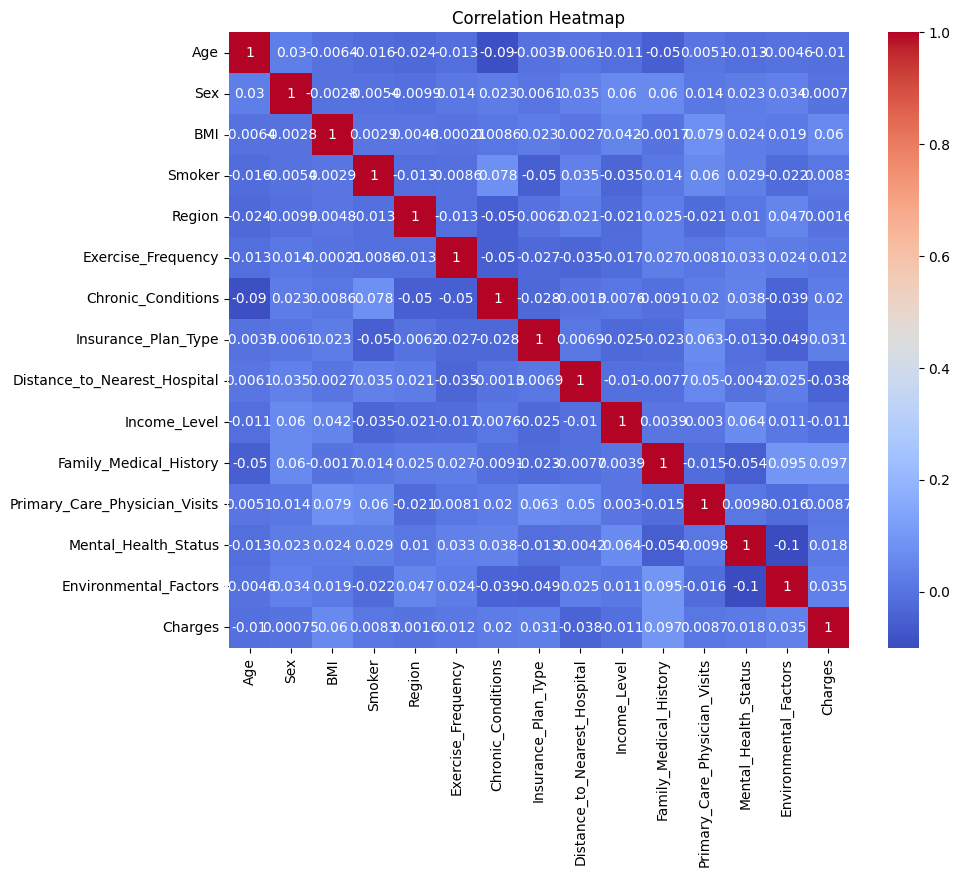

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. Heatmaps are particularly useful for visualizing the correlation structure of a correlation matrix or displaying the density of data points in a two-dimensional space.

correlation matrix provides a numerical representation of correlations between variables, a heatmap offers a visual representation of these correlations using colors. \
A correlation matrix is a tabular representation of pairwise correlations between variables in a dataset.\
A heatmap is a graphical representation of data where the individual values in a matrix are represented as colors.

# 5 Outlier Detection and Treatment

In [23]:
df.describe()

,Age,Sex,BMI,Smoker,Region,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,Distance_to_Nearest_Hospital,Income_Level,Family_Medical_History,Primary_Care_Physician_Visits,Mental_Health_Status,Environmental_Factors,Charges
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,48.167000,0.486000,25.098917,0.511000,1.546000,1.924000,1.604000,1.001000,10.625031,0.983000,0.506000,4.964000,1.548000,0.728000,10149.250960
std,18.009427,0.500054,4.890301,0.500129,1.082153,1.435369,1.014995,0.824426,5.433559,0.812016,0.500214,2.599897,1.088522,0.837088,3006.201159
min,18.000000,0.000000,8.889366,0.000000,0.000000,0.000000,0.000000,0.000000,1.000381,0.000000,0.000000,1.000000,0.000000,0.000000,1910.048000
25%,33.000000,0.000000,21.950460,0.000000,1.000000,1.000000,1.000000,0.000000,5.932067,0.000000,0.000000,3.000000,1.000000,0.000000,8193.242000
50%,48.000000,0.000000,25.270985,1.000000,2.000000,2.000000,2.000000,1.000000,10.953870,1.000000,1.000000,5.000000,2.000000,0.000000,10228.765000
75%,64.000000,1.000000,28.144568,1.000000,2.000000,3.000000,2.000000,2.000000,15.263208,2.000000,1.000000,7.000000,2.250000,2.000000,12157.125000
max,79.000000,1.000000,39.558080,1.000000,3.000000,4.000000,3.000000,2.000000,19.996930,2.000000,1.000000,9.000000,3.000000,2.000000,19139.980000


An outlier is an observation or data point that deviates significantly from other observations in a dataset. In simpler terms, an outlier is a data point that lies outside the normal range of variation in a dataset. Outliers can occur due to various reasons, such as measurement error, experimental error, or natural variation in the data.

# 5.1 check the outliers using boxplot

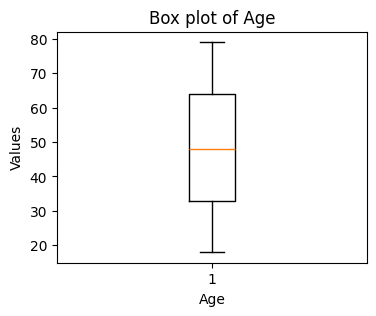

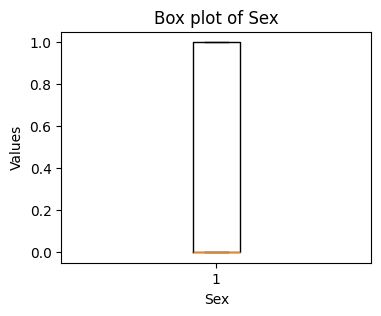

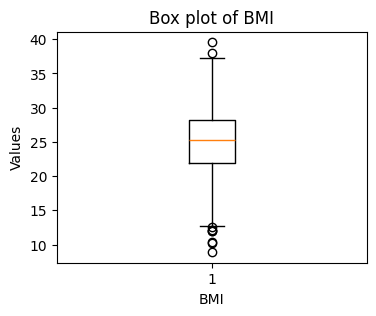

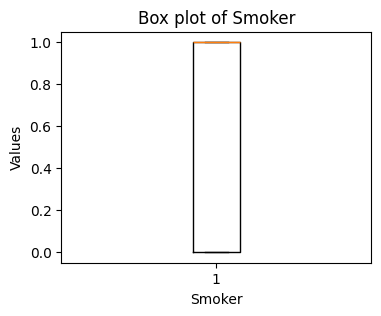

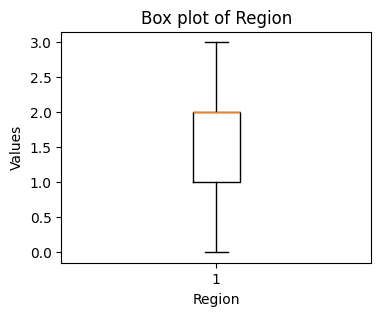

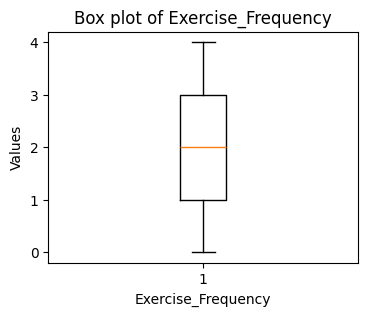

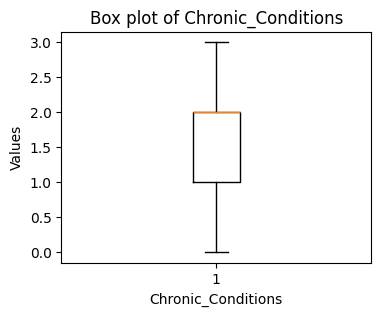

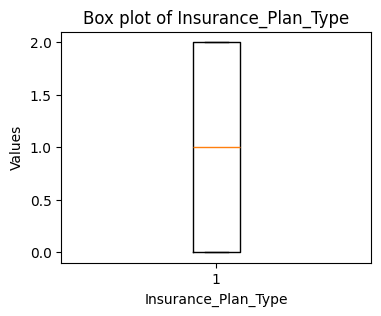

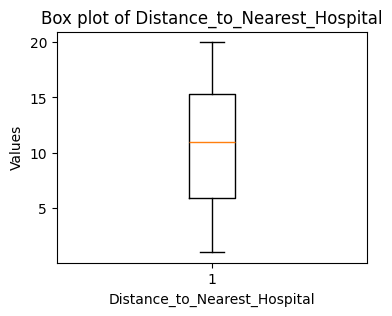

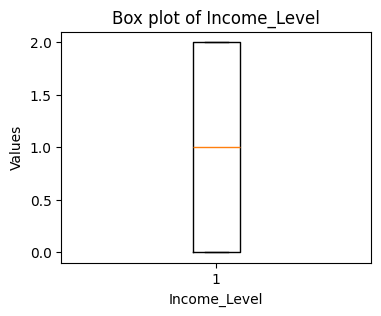

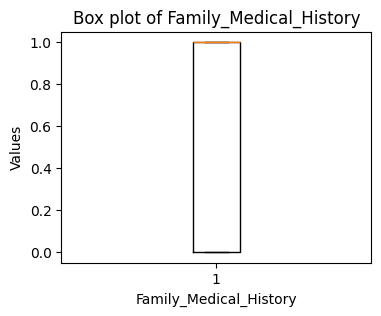

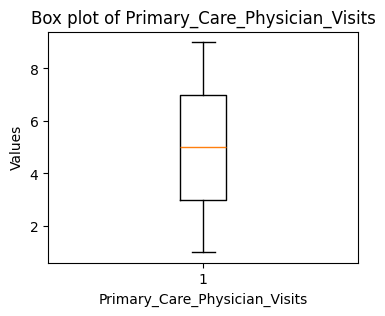

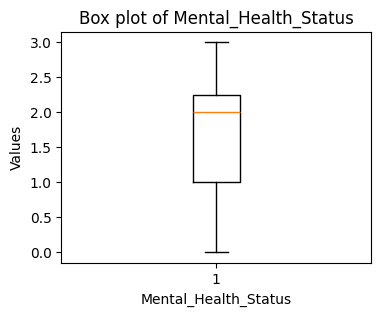

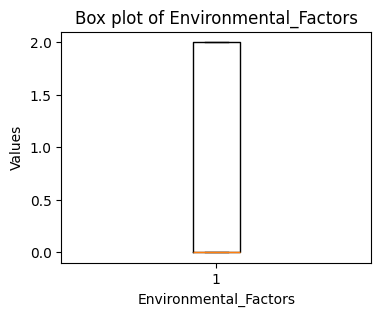

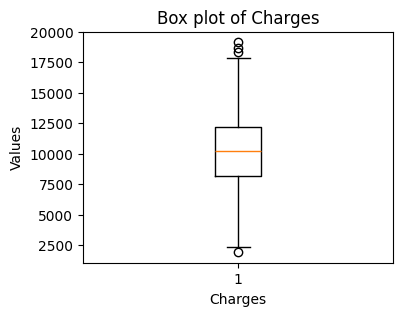

In [24]:
for column in df.columns:
    plt.figure(figsize=(4,3))
    plt.title(f'Box plot of {column}')
    plt.boxplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()


<Axes: ylabel='BMI'>

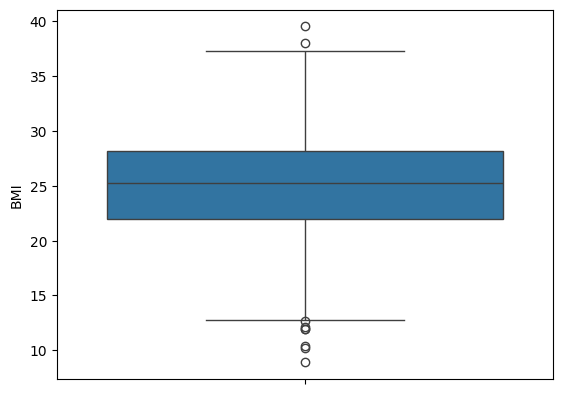

In [25]:
sns.boxplot(df["BMI"])

<Axes: ylabel='Charges'>

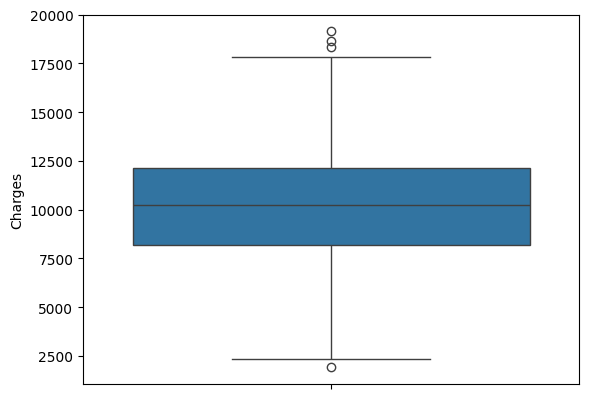

In [26]:
sns.boxplot(df["Charges"])

#  5.2  Remove the outliers using IQR Method

In [27]:
def remove_outlier(col):
    sorted(col)
    q1,q3 = col.quantile([0.25,0.75])
    IQR =q3-q1
    lower_bound= q1-(1.5*IQR)
    upper_bound= q3+(1.5*IQR)
    return lower_bound,upper_bound

Sort the column values.
Calculate the first and third quartiles.
Calculate the Interquartile Range (IQR).
Calculate the lower bound.
Calculate the upper bound.
Return the lower and upper bounds

In [28]:
low,high=remove_outlier(df["BMI"])
df["BMI"]=np.where(df["BMI"]>high,high,df["BMI"])
df["BMI"]=np.where(df["BMI"]<low,low,df["BMI"])

This lines calculates the lower and upper bounds (low and high) for outlier detection based on the "BMI" column of the DataFrame df using the remove_outlier function.Replaces any values in the "BMI" column of the DataFrame df that are greater than the calculated upper bound (high) with the upper bound value itself.Replaces any values in the "BMI" column of the DataFrame df that are less than the calculated lower bound (low) with the lower bound value itself.

<Axes: ylabel='BMI'>

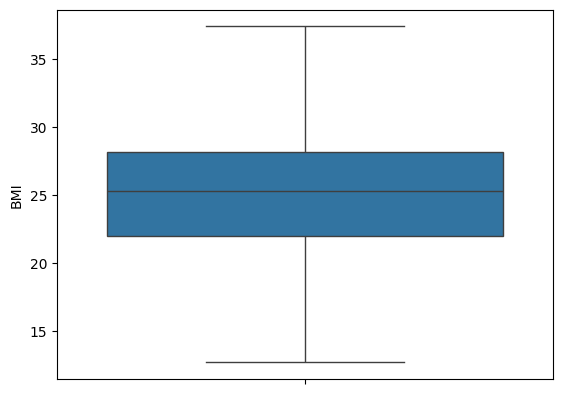

In [29]:
sns.boxplot(df["BMI"])

In [30]:
low,high=remove_outlier(df["Charges"])
df["Charges"]=np.where(df["Charges"]>high,high,df["Charges"])
df["Charges"]=np.where(df["Charges"]<low,low,df["Charges"])

This lines calculates the lower and upper bounds (low and high) for outlier detection based on the "Charges" column of the DataFrame df using the remove_outlier function.Replaces any values in the "Charges" column of the DataFrame df that are greater than the calculated upper bound (high) with the upper bound value itself.Replaces any values in the "Charges" column of the DataFrame df that are less than the calculated lower bound (low) with the lower bound value itself.

<Axes: ylabel='Charges'>

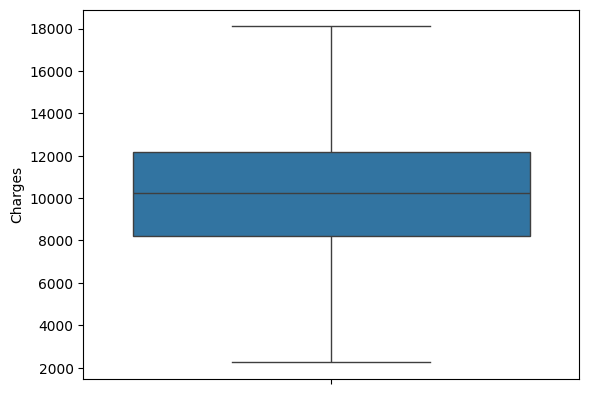

In [31]:
sns.boxplot(df["Charges"])

Note: This code snippet identifies outliers in the "BMI" column of a DataFrame df, calculates their upper and lower bounds, and then caps the outliers at these bounds. It uses NumPy's np.where function for conditional replacement.

# 6 Feature Scaling/Normalization:

Feature scaling is a preprocessing technique used in machine learning to standardize the range of independent variables or features in a dataset. The goal of feature scaling is to bring all features to the same scale or range, which can help improve the performance and convergence of machine learning algorithms.

.Standardization (Z-score normalization):

Advantages: Standardization transforms the data to have a mean of 0 and a standard deviation of 1, making it robust to outliers. It doesn't bound the data to a specific range.
Considerations: It's commonly used and effective, particularly if the distribution of your features is close to normal.
Standardization transforms the data to have a mean of 0 and a standard deviation of 1. It is calculated using the formula:

X
std
=
(X
−
μ
)/
σ 

 

where 
X is the original feature value, 
μ is the mean of the feature, and 
σ is the standard deviation of the feature.

The z_score_standardize function you provided aims to standardize each column in a DataFrame df using z-score standardization.\
Calculates the mean of each column in the DataFrame df along the specified axis (axis 0 corresponds to columns).\

Calculates the standard deviation of each column in the DataFrame df along the specified axis (axis 0 corresponds to columns).\

Standardizes each column in the DataFrame df using z-score standardization. It subtracts the mean of each column from the column values and then divides by the standard deviation of each column.\

Returns the standardized DataFrame containing z-score standardized values.

In [32]:
def z_score_standardize(df):
    mean = np.mean(df,axis=0)
    std_dev = np.std(df,axis=0)
    standardized_data = (df - mean) / std_dev
    return standardized_data

standardized_data = z_score_standardize(df)
#print("Original data:", df)
print("Standardized data:")
standardized_data

Standardized data:


,Age,Sex,BMI,Smoker,Region,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,Distance_to_Nearest_Hospital,Income_Level,Family_Medical_History,Primary_Care_Physician_Visits,Mental_Health_Status,Environmental_Factors,Charges
0,0.768482,1.028403,-0.352624,0.978237,-1.429348,1.447042,0.390345,-0.001214,-1.014973,0.020946,0.988071,1.553146,1.334586,-0.870116,-0.847971
1,0.935145,1.028403,-0.632857,0.978237,-0.504802,-1.341093,0.390345,-1.214785,1.543355,-1.211173,-1.012073,-0.755793,1.334586,1.520313,-1.027252
2,1.268470,1.028403,-0.426062,-1.022247,-0.504802,1.447042,0.390345,-0.001214,-0.184269,1.253065,0.988071,1.553146,1.334586,-0.870116,-1.890696
3,-1.675905,-0.972381,-0.058515,0.978237,-0.504802,0.052975,-1.581095,1.212358,0.229119,1.253065,0.988071,0.783500,1.334586,-0.870116,0.932778
4,-1.509243,1.028403,-0.342709,-1.022247,-0.504802,0.052975,-1.581095,-1.214785,0.832482,1.253065,-1.012073,0.398677,0.415450,-0.870116,-0.624386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.490687,1.028403,-0.190276,-1.022247,1.344290,0.052975,0.390345,1.212358,-1.028114,0.020946,-1.012073,-1.525439,0.415450,0.325098,-0.934672
996,-1.342580,-0.972381,2.433154,-1.022247,-1.429348,-0.644059,-1.581095,-1.214785,0.192935,1.253065,0.988071,-1.525439,1.334586,0.325098,0.975230
997,-0.620374,1.028403,0.049680,0.978237,-0.504802,-0.644059,1.376065,-0.001214,0.854882,0.020946,-1.012073,1.553146,0.415450,0.325098,0.105243
998,0.212939,-0.972381,0.222550,-1.022247,1.344290,0.750008,1.376065,-0.001214,0.229515,1.253065,-1.012073,1.168323,0.415450,1.520313,-0.950748


In [33]:
standardized_data.describe()

,Age,Sex,BMI,Smoker,Region,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,Distance_to_Nearest_Hospital,Income_Level,Family_Medical_History,Primary_Care_Physician_Visits,Mental_Health_Status,Environmental_Factors,Charges
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-9.592327e-17,5.329071e-17,-7.460699e-17,-1.065814e-16,-2.131628e-17,1.172396e-16,-9.592327e-17,5.417888e-17,1.918465e-16,-1.776357e-18,7.105427e-18,-1.421085e-16,-2.842171e-17,3.907985e-17,4.263256e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.675905e+00,-9.723812e-01,-2.565919e+00,-1.022247e+00,-1.429348e+00,-1.341093e+00,-1.581095e+00,-1.214785e+00,-1.772221e+00,-1.211173e+00,-1.012073e+00,-1.525439e+00,-1.422823e+00,-8.701165e-01,-2.634589e+00
25%,-8.425915e-01,-9.723812e-01,-6.506300e-01,-1.022247e+00,-5.048022e-01,-6.440590e-01,-5.953748e-01,-1.214785e+00,-8.641319e-01,-1.211173e+00,-1.012073e+00,-7.557926e-01,-5.036867e-01,-8.701165e-01,-6.517879e-01
50%,-9.277561e-03,-9.723812e-01,3.386625e-02,9.782368e-01,4.197440e-01,5.297455e-02,3.903450e-01,-1.213572e-03,6.055032e-02,2.094602e-02,9.880711e-01,1.385363e-02,4.154496e-01,-8.701165e-01,2.701408e-02
75%,8.795906e-01,1.028403e+00,6.262294e-01,9.782368e-01,4.197440e-01,7.500081e-01,3.903450e-01,1.212358e+00,8.540438e-01,1.253065e+00,9.880711e-01,7.834998e-01,6.452337e-01,1.520313e+00,6.700795e-01
max,1.712905e+00,1.028403e+00,2.541518e+00,9.782368e-01,1.344290e+00,1.447042e+00,1.376065e+00,1.212358e+00,1.725681e+00,1.253065e+00,9.880711e-01,1.553146e+00,1.334586e+00,1.520313e+00,2.652881e+00


This code defines a function z_score_standardize() that takes a list of data as input and returns the standardized data using the Z-score method. The numpy library is used for efficient numerical operations. The function calculates the mean and standard deviation of the input data, and then standardizes the data by subtracting the mean and dividing by the standard deviation.However, the more important aspects is that the standard deviation is needed 1 after standardization.

# 7. Exploratory Data Analysis (EDA)

# 7.1. Data Visualization

Visualize the data and analysis results using plots and charts to communicate insights effectively. This helps in understanding complex relationships and patterns in the data.

# 7. 1.1 barplot (Charges vs Age)

In [34]:
print(f"Minimum value in 'Age': {df['Age'].min()}")
print(f"Maximum value in 'Age': {df['Age'].max()}")

Minimum value in 'Age': 18
Maximum value in 'Age': 79


C:\Users\user\AppData\Local\Temp\ipykernel_5132\3358921676.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_charges_by_age = age_charges_df.groupby('Age Group')['Charges'].mean()


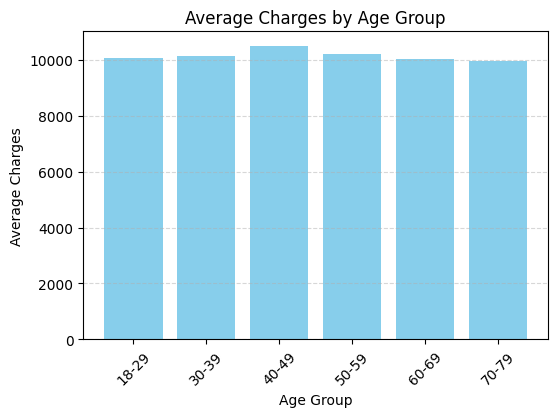

In [35]:
bins = [18, 30, 40, 50, 60, 70, 80]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79']
age_classes = pd.cut(df['Age'], bins=bins, labels=labels)

# Create a new DataFrame with age classes and charges
age_charges_df = pd.DataFrame({'Age Group': age_classes, 'Charges': df['Charges']})

# Calculate the average charges for each age group
avg_charges_by_age = age_charges_df.groupby('Age Group')['Charges'].mean()
plt.figure(figsize=(6, 4))
plt.bar(avg_charges_by_age.index, avg_charges_by_age.values, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age Group')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

The bar graph shows the total charges incurred within each age class. \
Higher charges associated with age groups 40 - 49,lower charges associated with age group 70 - 79.

# 7.1.2 bar plot(Gender vs Charges)

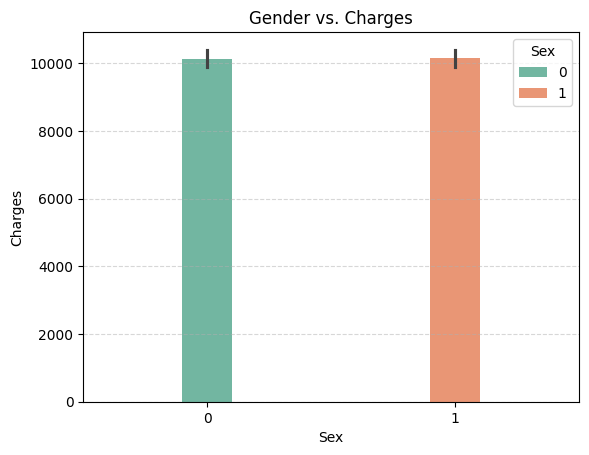

In [36]:

sns.barplot(x='Sex', y='Charges',hue='Sex',width =0.2, data=df, palette='Set2')
plt.title('Gender vs. Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

0- Female\
1- Male\
The fact that the bars for each gender category are approximately the same height suggests that, on average, charges do not vary significantly based on gender in the dataset.

# 7.1.3 pie chart(Total charges vs Region)

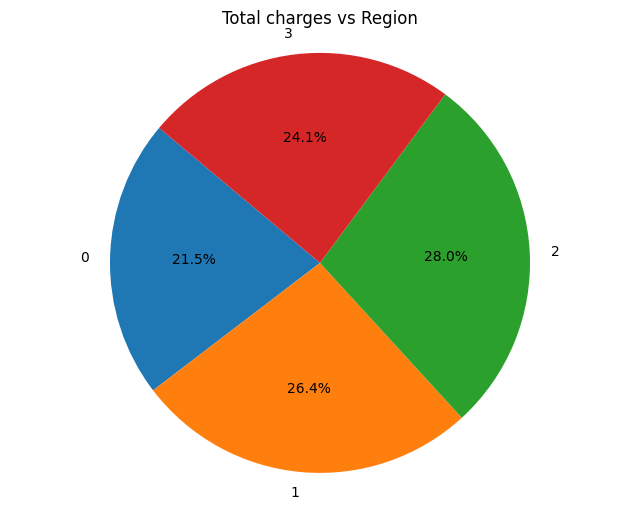

In [37]:
plt.figure(figsize=(8, 6))
total_charges_by_region = df.groupby('Region')['Charges'].sum()
plt.pie(total_charges_by_region,labels=total_charges_by_region.index, autopct='%1.1f%%', startangle=140)

plt.title('Total charges vs Region')

# Add legend

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

0 - East\
1 - North\
2 - South\
3 - West\
Region South has the highest percentage of charges: With 28.0% of the charges , it appears to be the most prevalent Region in the dataset.\
Region West has the lowest percentage: Despite still being a substantial portion at 24.1%.\
The charges are distributed among the Regions fairly evenly, with no single category dominating the distribution.

# 7.1.4 barplot(BMI vs Charges)

In [38]:
print(f"Minimum value in 'BMI': {df['BMI'].min()}")
print(f"Maximum value in 'BMI': {df['BMI'].max()}")

Minimum value in 'BMI': 12.659298749999998
Maximum value in 'BMI': 37.43572875


C:\Users\user\AppData\Local\Temp\ipykernel_5132\2742627401.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_charges_by_bmi = bmi_charges_df.groupby('BMI Class')['Charges'].mean()


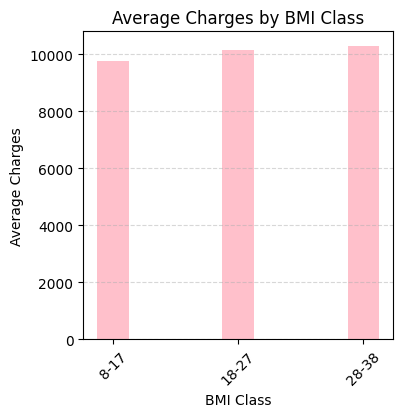

In [39]:
bins = [8,18,28, 38]
labels = ['8-17', '18-27',  '28-38']
bmi_classes = pd.cut(df['BMI'], bins=bins, labels=labels)

# Create a new DataFrame with BMI classes and charges
bmi_charges_df = pd.DataFrame({'BMI Class': bmi_classes, 'Charges': df['Charges']})

# Calculate the average charges for each BMI class
avg_charges_by_bmi = bmi_charges_df.groupby('BMI Class')['Charges'].mean()

# Plot BMI vs average charges
plt.figure(figsize=(4, 4))
plt.bar(avg_charges_by_bmi.index, avg_charges_by_bmi.values, width =0.25,color='pink')
plt.xlabel('BMI Class')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI Class')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

The barplot of BMI vs. Charges reveals that individuals with BMI values between 28 and 38 tend to have higher medical charges, particularly falling above 10000.This suggests that there may be a positive association between BMI and medical expenses within this BMI range.

# 7.1.5 boxplot(Charges by Smoking Status)

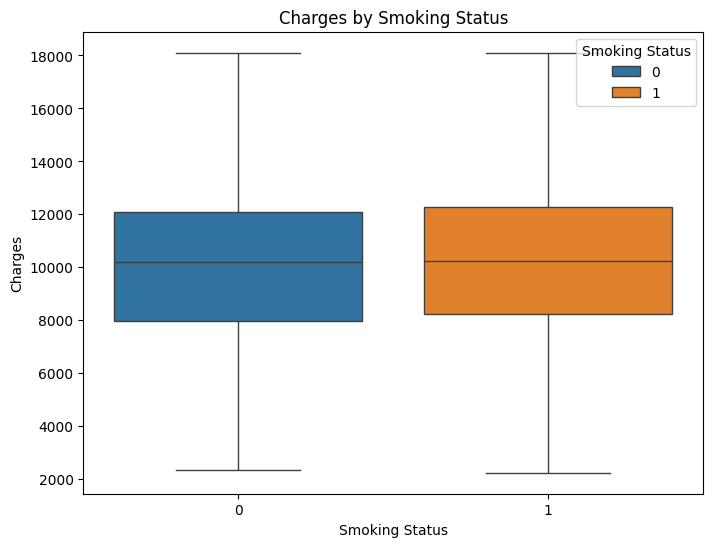

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Smoker', y='Charges', hue='Smoker', data=df)
plt.title('Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Charges')

# Add legend
plt.legend(title='Smoking Status', loc='upper right')

plt.show()

0 - No\
1 - Yes\
 Healthcare charges between smokers and non-smokers shows similar patterns.Charges by smoking status show that smokers tend to incur higher healthcare costs compared to non-smokers. This is because smoking is associated with a wide range of health issues.

# 7.1.6 pie chart(Total Charges vs Exercise Frequency)

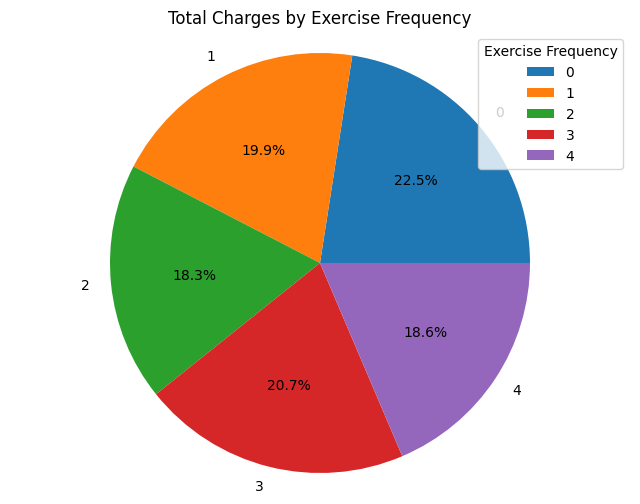

In [41]:
total_charges_by_exercise_freq = df.groupby('Exercise_Frequency')['Charges'].sum()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(total_charges_by_exercise_freq, labels=total_charges_by_exercise_freq.index, autopct='%1.1f%%', startangle=0)

# Add title
plt.title('Total Charges by Exercise Frequency')

# Add legend
plt.legend(title='Exercise Frequency', loc='upper right')

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Exercise_Frequency: The frequency of exercise for the patient, such as 'Daily', '2
times/week', '3 times/week', 'Once a week', or 'Rarely'\
0 -2 times/week\
1 -3 times/week\
2 -Daily\
3 -Once a week\
4 -Rarely\
The pie chart visualizes how total charges are distributed across different exercise frequency categories, quickly grasp the relative contribution of each Exercise Frequency to the total charges.Here, patient whose frequency of exercise is 2 times/week paid more medical charges.

# 7.1.7 barplot(charges vs chronic condition)

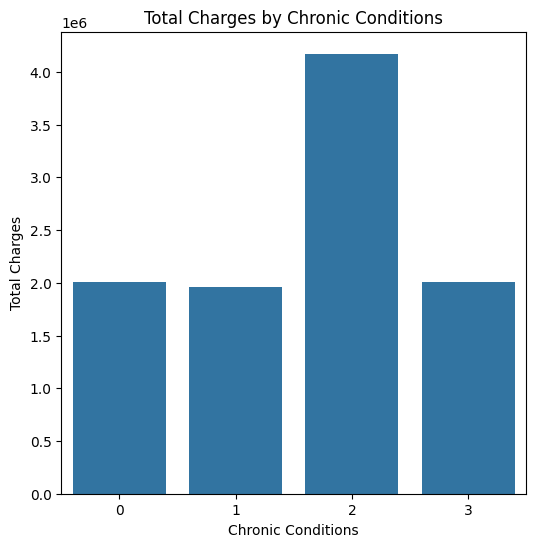

In [42]:
# Calculate total charges for each chronic condition category
total_charges_by_condition = df.groupby('Chronic_Conditions')['Charges'].sum().reset_index()

# Plot bar chart of chronic conditions vs total charges
plt.figure(figsize=(6, 6))
sns.barplot(x='Chronic_Conditions', y='Charges', data=total_charges_by_condition)

# Add title and labels
plt.title('Total Charges by Chronic Conditions')
plt.xlabel('Chronic Conditions')
plt.ylabel('Total Charges')

# Show plot
plt.show()

Chronic_Conditions: Any chronic conditions the patient may have, such as 
'Diabetes', 'High Blood Pressure', 'Heart Disease', or 'Arthritis'.\

0 -Arthritis\
1 -Diabetes\
2 -Heart Disease\
3 -High Blood Pressure\
Total charges associated with different chronic conditions, providing insights into the impact of these conditions on healthcare costs. From it is clear that patient who suffer Heart Disease paid high medical charges .


# 7.1.8 barplot(charges vs Mental Health Status)

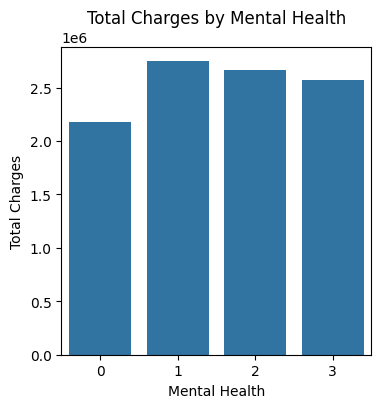

In [43]:
total_charges_by_mental_health = df.groupby('Mental_Health_Status')['Charges'].sum().reset_index()

# Plot bar chart of mental health vs total charges
plt.figure(figsize=(4, 4))
sns.barplot(x='Mental_Health_Status', y='Charges',data=total_charges_by_mental_health)

# Add title and labels
plt.title('Total Charges by Mental Health')
plt.xlabel('Mental Health')
plt.ylabel('Total Charges')

# Show plot
plt.show()

Mental_Health_Status: The mental health status of the patient, categorized as 'Poor', 'Fair',
'Good', or 'Excellent'.\
0 -Excellent\
1 -Fair\
2 -Good\
3 -Poor\
Individuals with 'Fair' mental health status may have better access to healthcare services compared to those categorized as 'Poor' or 'Excellent'. They may be more likely to seek medical care for both mental and physical health concerns, leading to higher medical charges.

# 7.1.9 barplot(Charges vs Insurance Plan Type)

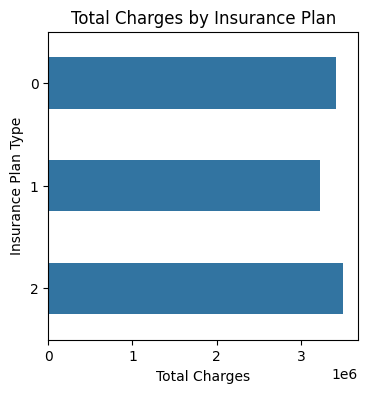

In [44]:
plt.figure(figsize=(4, 4))
total_charges = df.groupby(['Insurance_Plan_Type'])['Charges'].sum().reset_index()
sns.barplot(x='Charges', y='Insurance_Plan_Type',width =0.5, data=total_charges,orient='h')
plt.title('Total Charges by Insurance Plan')
plt.xlabel('Total Charges')
plt.ylabel('Insurance Plan Type')
plt.show()

"le6" typically stands for 1 million,orient='h' to make the bars horizontal\
Insurance Plan Type are:\
    0 -HDHP\
    1 -HMO\
    2 -PPO\
Individuals with a PPO (Preferred Provider Organization) insurance plan exhibit higher medical charges compared to those with other insurance plan types like HMO (Health Maintenance Organization) or HDHP (High Deductible Health Plan).

# 7.1.10 pie chart(Charges vs Income Level)

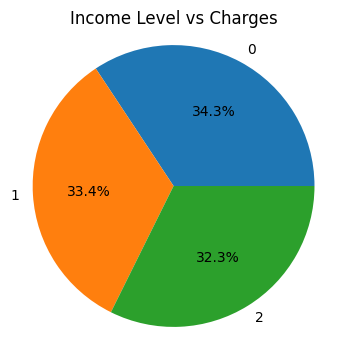

In [45]:
total_charges_by_income = df.groupby('Income_Level')['Charges'].sum()

# Extracting income levels and charges
income_levels = total_charges_by_income.index
charges = total_charges_by_income.values

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(charges, labels=income_levels, autopct='%1.1f%%', startangle=0)
plt.title('Income Level vs Charges')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

charges represents the data values (sizes of the pie slices), income_levels represents the labels, 
and autopct='%1.1f%%' formats the percentage labels on the chart.startangle specifies the angle at which the first slice starts.
plt.axis('equal') ensures that the pie chart is drawn as a circle.\
Income_Level: The income level of the patient, categorized:\
    0 -High\
    1 -Low\
    2 -Medium\
Distribution of total charges across different income levels, providing insights into how healthcare charges vary among individuals with different income levels.\
The percentages for each income level category are relatively close to each other, indicating a somewhat balanced distribution of charges across income levels. This suggests that individuals from different income brackets contribute somewhat equally to the total charges.








# 7.1.11 barplot(Charge vs Family Medical History)

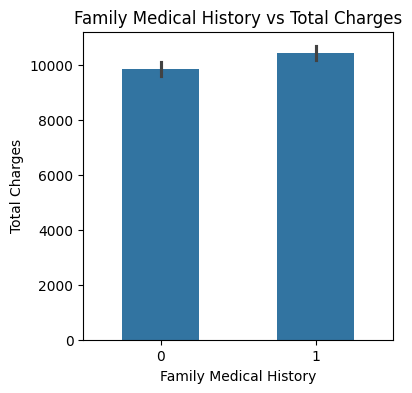

In [46]:
plt.figure(figsize=(4, 4))
sns.barplot(x='Family_Medical_History', y='Charges',width=0.5, data=df)
plt.title('Family Medical History vs Total Charges')
plt.xlabel('Family Medical History')
plt.ylabel('Total Charges')
plt.show()

Family_Medical_History: Indicates whether the patient has a family medical history or not, with values 'Yes' or 'No'.\
0 -No\
1 -Yes\
Individuals with a family medical history tend to have paid higher medical charges compared to those without a family medical history.Individuals with a family medical history may be more aware of potential health risks and more proactive in seeking medical care, which could result in earlier diagnosis and treatment of health issues but also higher medical charges due to increased healthcare utilization.

# 7.1.12 scatterplot(Charges vs Distance to Nearest Hospital)

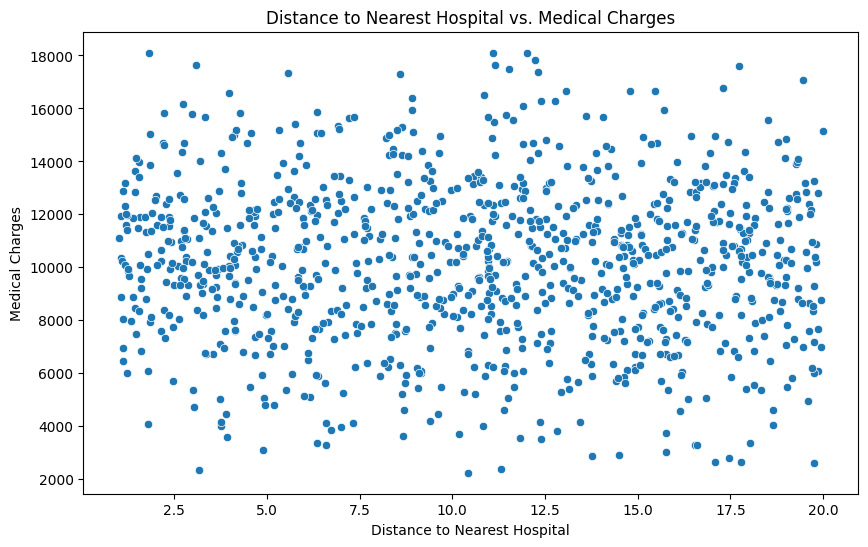

In [47]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance_to_Nearest_Hospital', y='Charges', data=df)
plt.title('Distance to Nearest Hospital vs. Medical Charges')
plt.xlabel('Distance to Nearest Hospital')
plt.ylabel('Medical Charges')
plt.show()


Distance_to_Nearest_Hospital: The distance to the nearest hospital from the patient's
residence.
Scatter plot indicates that distance to the nearest hospital alone may not be a strong predictor of medical charges in this scenario. Individuals living closer to hospitals do not necessarily have lower or higher medical charges compared to those living farther away.

# 7.1.13 scatterplot(Charges vs Primary Care Physician Visits)

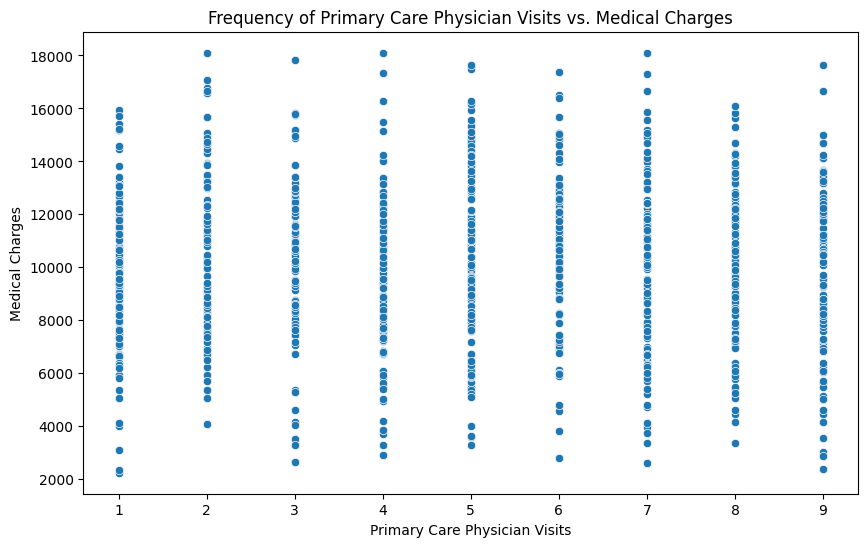

In [48]:
 #Scatter plot for Frequency of Primary Care Physician Visits vs. Medical Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Primary_Care_Physician_Visits', y='Charges', data=df)
plt.title('Frequency of Primary Care Physician Visits vs. Medical Charges')
plt.xlabel('Primary Care Physician Visits')
plt.ylabel('Medical Charges')
plt.show()


Primary_Care_Physician_Visits: The number of visits the patient makes to their primary
care physician. Frequency of primary care physician visits and medical charges, providing insights into how often individuals visit their primary care physicians and the corresponding impact on healthcare costs.Individuals who visit their primary care physicians more frequently do not necessarily have higher or lower medical charges compared to those who visit less often.

# Data Splitting

Split the dataset into training, validation, and testing sets to evaluate model
performance. 80-20

X_train : Training set of our predictor values X_test: Test set of our predictor values. Once model is trainned and we find best slope, we would predict the value for X_test y_train: Training set of dependent variables y_test: Test set of dependent variables.

In [49]:
from sklearn.model_selection import train_test_split
import pandas as pd
X=standardized_data[['Age','Sex','BMI','Smoker','Region','Exercise_Frequency','Chronic_Conditions',
                            'Insurance_Plan_Type','Distance_to_Nearest_Hospital','Income_Level','Family_Medical_History',
                            'Primary_Care_Physician_Visits','Mental_Health_Status','Environmental_Factors']]
y=standardized_data['Charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (800, 14)
Shape of X_test: (200, 14)
Shape of y_train: (800,)
Shape of y_test: (200,)


# Model Selection

Selecting the appropriate machine learning algorithm depends on various factors such as the nature of the problem, the characteristics of the data, the size of the dataset, computational resources available, and the desired outcomes. 
Regression problems involve predicting a continuous outcome variable based on one or more predictor variables. In other words, regression analysis is used to model the relationship between a dependent variable (the variable we want to predict) and one or more independent variables (the variables used to make the prediction).\

Machine learning is a subfield of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computers to learn from and make predictions or decisions based on data, without being explicitly programmed for each task.\

The main goal in regression analysis is to find the best-fitting mathematical model that describes the relationship between the independent variables and the dependent variable.\

1.Linear Regression \
2.Decision Trees\
3.Random Forests\
4.Support Vector Regression\
5. Gradient Boosting Regressor\
6.Lasso regression

# 1.Linear Regression

Simple and commonly used algorithm for regression tasks.\
Fits a linear relationship between the input features and the target variable.\
Assumes a linear relationship between the predictors and the target variable.\


In [50]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error(MAE):{mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared score: {r2}")

Mean Absolute Error(MAE):0.8501851808468541
Mean Squared Error (MSE): 1.1209955486925842
Root Mean Squared Error (RMSE): 1.0587707724963813
R-squared score: -0.023451533815265657


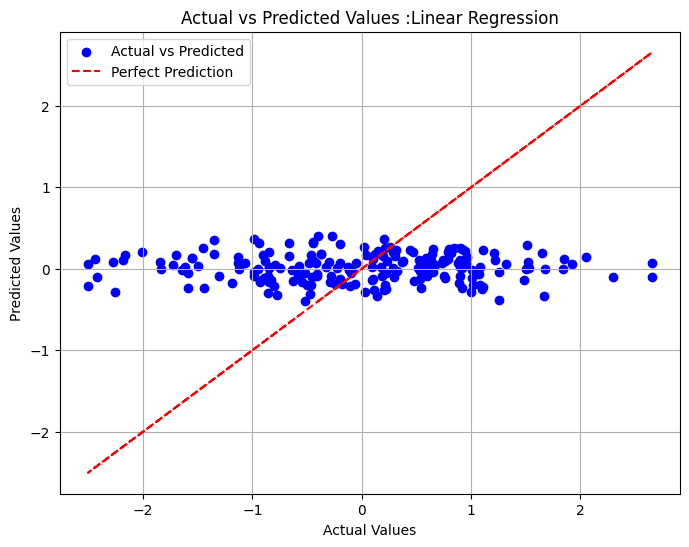

In [51]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values :Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Scatter plot with actual values on the x-axis and predicted values on the y-axis.\
Diagonal line to indicate perfect prediction

# 2.Decision Trees

Non-parametric supervised learning algorithm used for classification and regression tasks.\
Builds a tree-like structure where each internal node represents a decision based on a feature, and each leaf node represents the outcome.\
Can handle both numerical and categorical data.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error(MAE):{mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared score: {r2}")

Mean Absolute Error(MAE):1.1038171812059896
Mean Squared Error (MSE): 2.153520832044129
Root Mean Squared Error (RMSE): 1.4674879325037493
R-squared score: -0.9661310887712642


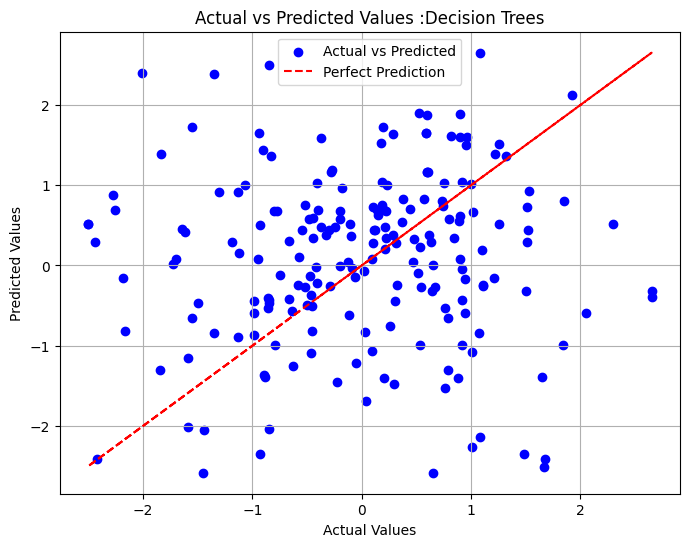

In [53]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values :Decision Trees')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 3.Random Forests

Ensemble learning method that constructs multiple decision trees during training and outputs the mode (classification) or mean prediction (regression) of the individual trees.\
Builds each tree using a random subset of the training data and a random subset of the features, which helps to reduce overfitting and improve generalization.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error(MAE):{mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared score: {r2}")

Mean Absolute Error(MAE):0.8235025726250494
Mean Squared Error (MSE): 1.0776413180932805
Root Mean Squared Error (RMSE): 1.0380950428998688
R-squared score: 0.016130205698319244


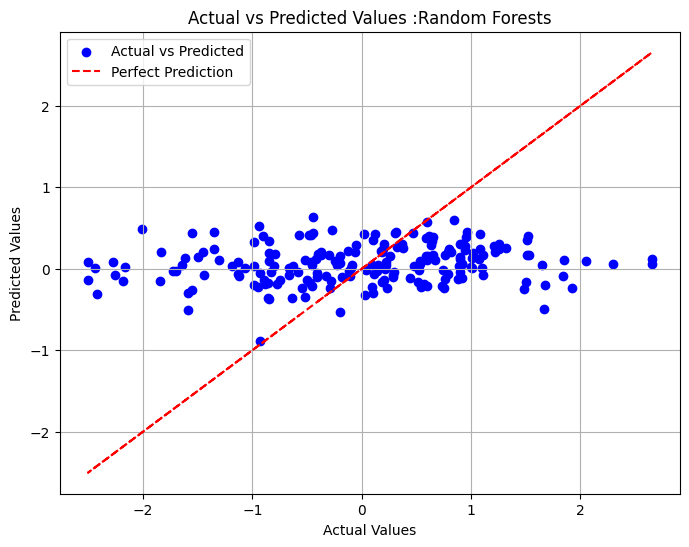

In [55]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values :Random Forests')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 4.Support Vector Regression

Supervised learning algorithm used for classification and regression tasks.\
Effective in high-dimensional spaces, even when the number of features exceeds the number of samples.\

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
model = SVR(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error(MAE):{mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared score: {r2}")

Mean Absolute Error(MAE):0.8420714643226528
Mean Squared Error (MSE): 1.111823483266068
Root Mean Squared Error (RMSE): 1.0544304070283956
R-squared score: -0.015077580466414275


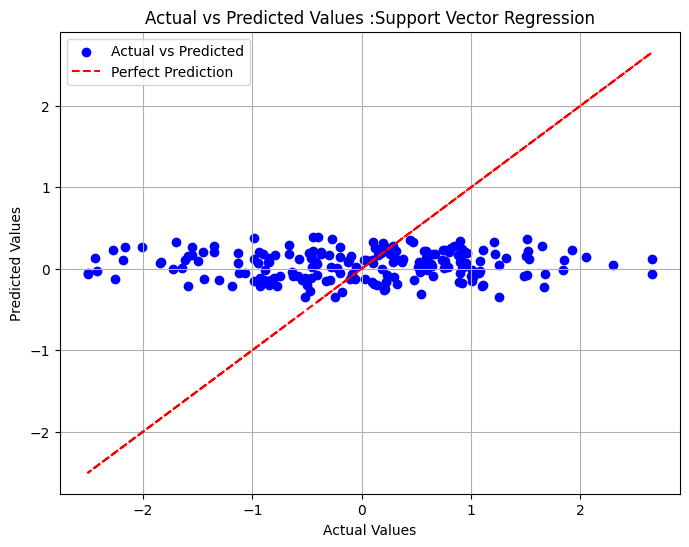

In [57]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values :Support Vector Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 5. Gradient Boosting Regressor

Ensemble learning technique that builds a strong learner by sequentially adding weak learners (usually decision trees) to minimize errors.\
Works by fitting each new model to the residuals (errors) of the previous model, focusing on the areas where the previous model performed poorly.\
Combines multiple weak models to create a powerful ensemble model that generalizes well to unseen data.

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_regressor = GradientBoostingRegressor()

gb_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = gb_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error(MAE):{mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared score: {r2}")

Mean Absolute Error(MAE):0.8411433112410598
Mean Squared Error (MSE): 1.1482384531706438
Root Mean Squared Error (RMSE): 1.071558889268641
R-squared score: -0.04832388268959553


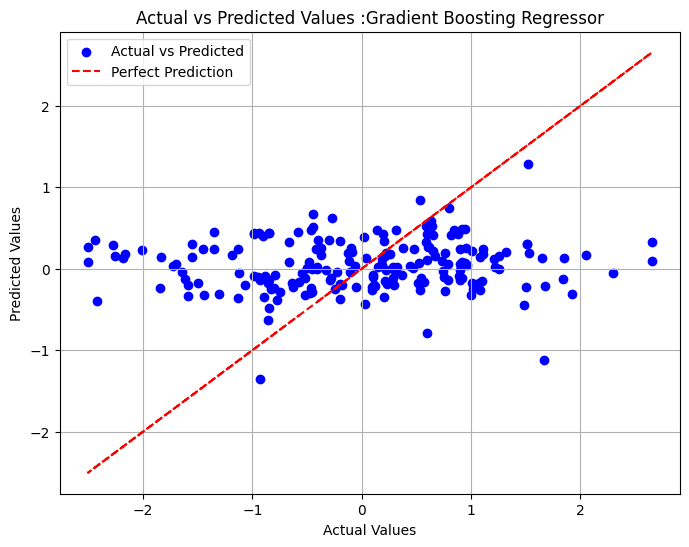

In [59]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values :Gradient Boosting Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 6. Lasso Regression model

Regularized version of linear regression that adds a penalty term to the loss function.\
Encourages sparse solutions by penalizing the absolute values of the coefficients.\
Used for feature selection and dealing with multicollinearity in datasets with many predictors.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
model = Lasso()
# Fit the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared score: {r2}")

Mean Absolute Error (MAE): 0.8510377467463993
Mean Squared Error (MSE): 1.0953109328836899
Root Mean Squared Error (RMSE): 1.0465710357561449
R-squared score: -1.878305279978676e-06


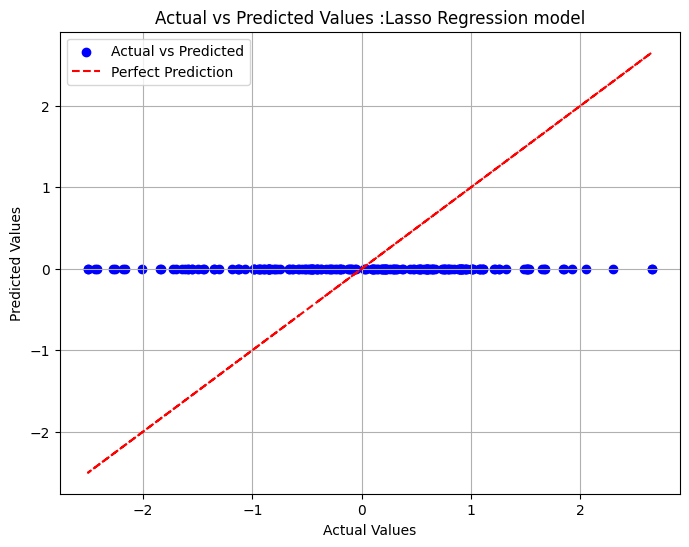

In [61]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values :Lasso Regression model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Compare and evaluate the Model results and find the best model

In [62]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Support Vector Machine', SVR(kernel='linear')),
    ('Gradient Boosting Regressor',GradientBoostingRegressor()),
    ('Lasso Regression model',Lasso())
]
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append([name,mae, mse, rmse, r2])
results_df = pd.DataFrame(results, columns=['Model','MAE', 'MSE', 'RMSE', 'R-squared'])
print("Model Comparison:")
print(results_df)
best_mae = results_df['MAE'].idxmin()
best_mse = results_df['MSE'].idxmin()
best_rmse = results_df['RMSE'].idxmin()
best_r2 = results_df['R-squared'].idxmax()
best_model = results_df.loc[[best_mae,best_mse, best_rmse, best_r2]].iloc[0]
print("\nBest performing models based on metrics:")
print(best_model)

Model Comparison:
                         Model       MAE       MSE      RMSE  R-squared
0            Linear Regression  0.850185  1.120996  1.058771  -0.023452
1                Decision Tree  1.103817  2.153521  1.467488  -0.966131
2                Random Forest  0.823503  1.077641  1.038095   0.016130
3       Support Vector Machine  0.842071  1.111823  1.054430  -0.015078
4  Gradient Boosting Regressor  0.839424  1.146945  1.070955  -0.047143
5       Lasso Regression model  0.851038  1.095311  1.046571  -0.000002

Best performing models based on metrics:
Model        Random Forest
MAE               0.823503
MSE               1.077641
RMSE              1.038095
R-squared          0.01613
Name: 2, dtype: object


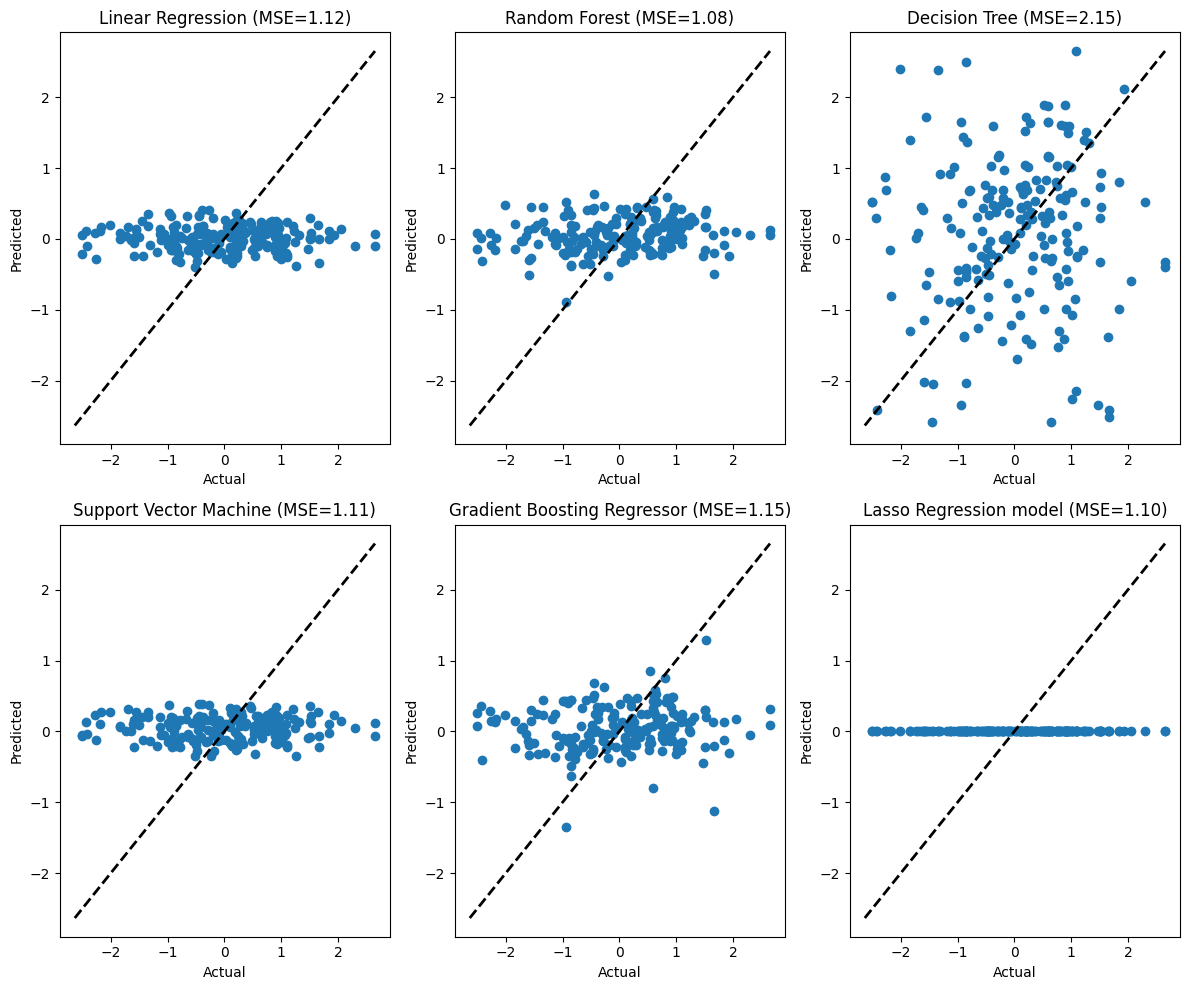

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Initialize regression models
models = {'Linear Regression': LinearRegression(),
          'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
         'Decision Tree': DecisionTreeRegressor(random_state=42),
         'Support Vector Machine': SVR(kernel='linear'),
          'Gradient Boosting Regressor':GradientBoostingRegressor(),
          'Lasso Regression model':Lasso()}

# Plot actual vs predicted values for each model
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.ravel()

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    axs[idx].scatter(y_test, y_pred)
    axs[idx].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    axs[idx].set_title(f'{name} (MSE={mse:.2f})')
    axs[idx].set_xlabel('Actual')
    axs[idx].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

# Model training

In [64]:
X = df.drop('Charges', axis=1)
y = df['Charges']


Model training refers to the process of teaching a machine learning algorithm to recognize patterns and make predictions based on input data.

In [65]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  
random_forest_regressor.fit(X, y)

RandomForestRegressor(random_state=42)

Setting random_state=42 provides reproducibility and consistency in your machine learning experiments, making your results more reliable and easier to debug.

#  Save the trained model to a file

In [66]:
import pickle
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(random_forest_regressor, file)
    

Save the trained model using Python's built-in pickle module.

In [67]:
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# predict the charges on new customer

In [68]:
df.columns

Index(['Age', 'Sex', 'BMI', 'Smoker', 'Region', 'Exercise_Frequency',
       'Chronic_Conditions', 'Insurance_Plan_Type',
       'Distance_to_Nearest_Hospital', 'Income_Level',
       'Family_Medical_History', 'Primary_Care_Physician_Visits',
       'Mental_Health_Status', 'Environmental_Factors', 'Charges'],
      dtype='object')

In [69]:
 #Prepare the new customer's data
data ={'Age': 50,
    'Sex': 1,
    'BMI': 65,
    'Smoker': 0,
    'Region': 2,
    'Exercise_Frequency':1,
    'Chronic_Conditions': 0,
    'Insurance_Plan_Type':1,
    'Distance_to_Nearest_Hospital':20,
    'Income_Level':1,
    'Family_Medical_History':0,
    'Primary_Care_Physician_Visits':4,
    'Mental_Health_Status':2,
    'Environmental_Factors':0}

In [70]:
new_customer=pd.DataFrame(data,index=[0])
new_customer

,Age,Sex,BMI,Smoker,Region,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,Distance_to_Nearest_Hospital,Income_Level,Family_Medical_History,Primary_Care_Physician_Visits,Mental_Health_Status,Environmental_Factors
0,50,1,65,0,2,1,0,1,20,1,0,4,2,0


In [71]:
import joblib
model=joblib.load('random_forest_model.pkl')
model.predict(new_customer)

array([10291.48669])

Load a trained machine learning model stored in a file named random_forest_model.pkl using joblib and then use it to make predictions on new data.

# GUI

To integrate the model prediction process into a GUI, you can use the tkinter library in Python. 

It creates a tkinter window (master) and sets its title.
Labels and Entry widgets are created for user input for various features.\
A button labeled "Predict" is added, which triggers the show_entry() function when clicked.\
In the show_entry() function, it retrieves the values entered by the user in the Entry widgets, converts them to floats, loads the pre-trained model using joblib, makes predictions on the entered data, and displays the result using Label widgets.

In [73]:
from tkinter import *
import joblib

#This function extracts input values from entry widgets and makes predictions using the loaded machine learning model
def show_entry():
    p1 = float(e1.get())
    p2 = int(e2_var.get().split(':')[0])
    p3 = float(e3.get())
    p4 = int(e4_var.get().split(':')[0])
    p5 = int(e5_var.get().split(':')[0])
    p6 = int(e6_var.get().split(':')[0])
    p7 = int(e7_var.get().split(':')[0])
    p8 = int(e8_var.get().split(':')[0])
    p9 = float(e9.get())
    p10 = int(e10_var.get().split(':')[0])
    p11 = int(e11_var.get().split(':')[0])
    p12 = float(e12.get())
    p13 = int(e13_var.get().split(':')[0])
    p14 = int(e14_var.get().split(':')[0])
    
    model = joblib.load('random_forest_model.pkl')
    result = model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14]])
    
    Label(result_frame, text='Medical Insurance Cost').pack()
    Label(result_frame, text=result).pack()
    
#This creates the main window for the application with the title "Medical Insurance Cost Prediction"
master = Tk()
master.title("Medical Insurance Cost Prediction")
label = Label(master, text='Medical Insurance Cost Prediction', bg='black', fg='white')
label.grid(row=0, columnspan=2)

#This code creates labels for various input fields
Label(master, text="Enter your Age").grid(row=1, sticky='e')
Label(master, text="Male or Female [0/1]").grid(row=2, sticky='e')
Label(master, text="Enter your BMI Value").grid(row=3, sticky='e')
Label(master, text="Smoker :0-(Yes),1-(No) ").grid(row=4, sticky='e')
Label(master, text="Region : 0 -(East), 1 -(North), 2-(South), 3 -(West)").grid(row=5, sticky='e')
Label(master, text="Exercise Frequency : 0 -(2 times/week), 1-(3 times/week), 2-(Daily), 3 -(Once a week), 4 -(Rarely)").grid(row=6, sticky='e')
Label(master, text="Chronic Conditions : 0-(Arthritis), 1-(Diabetes), 2-(Heart Disease), 3-(High Blood Pressure)").grid(row=7, sticky='e')
Label(master, text="Insurance Plan Type : 0-(HDHP), 1-(HMO), 2-(PPO)").grid(row=8, sticky='e')
Label(master, text="Enter your Distance to Nearest Hospital").grid(row=9, sticky='e')
Label(master, text="Income Level : 0-(High), 1-(Low), 2-(Medium) ").grid(row=10, sticky='e')
Label(master, text="Family Medical History : 0-(No), 1-(Yes) ").grid(row=11, sticky='e')
Label(master, text="No. of Primary Care Physician Visits").grid(row=12, sticky='e')
Label(master, text="Mental Health Status : 0-(Excellent), 1-(Fair), 2-(Good), 3-(Poor) ").grid(row=13, sticky='e')
Label(master, text="Environmental Factors : 0-(High), 1-(Low), 2-(Moderate) ").grid(row=14, sticky='e')

#create entry widgets for numerical input fields and OptionMenus for dropdown selection fields.
e1 = Entry(master)
e2_var = StringVar(master, value="0")
e2 = OptionMenu(master, e2_var, "0", "1")
e3 = Entry(master)
e4_var = StringVar(master, value="0")
e4 = OptionMenu(master, e4_var, "0", "1")
e5_var = StringVar(master, value="0")
e5 = OptionMenu(master, e5_var, "0", "1", "2", "3")
e6_var = StringVar(master, value="0")
e6 = OptionMenu(master, e6_var, "0", "1", "2", "3", "4")
e7_var = StringVar(master, value="0")
e7 = OptionMenu(master, e7_var, "0", "1", "2", "3")
e8_var = StringVar(master, value="0")
e8 = OptionMenu(master, e8_var, "0", "1", "2")
e9 = Entry(master)
e10_var = StringVar(master, value="0")
e10 = OptionMenu(master, e10_var, "0", "1", "2")
e11_var = StringVar(master, value="0")
e11 = OptionMenu(master, e11_var, "0", "1")
e12 = Entry(master)
e13_var = StringVar(master, value="0")
e13 = OptionMenu(master, e13_var, "0", "1", "2", "3")
e14_var = StringVar(master, value="0")
e14 = OptionMenu(master, e14_var, "0", "1", "2")

#This code places the entry and optionmenu widgets on the Tkinter grid layout
e1.grid(row=1, column=1, padx=5, pady=5)
e2.grid(row=2, column=1, padx=5, pady=5)
e3.grid(row=3, column=1, padx=5, pady=5)
e4.grid(row=4, column=1, padx=5, pady=5)
e5.grid(row=5, column=1, padx=5, pady=5)
e6.grid(row=6, column=1, padx=5, pady=5)
e7.grid(row=7, column=1, padx=5, pady=5)
e8.grid(row=8, column=1, padx=5, pady=5)
e9.grid(row=9, column=1, padx=5, pady=5)
e10.grid(row=10, column=1, padx=5, pady=5)
e11.grid(row=11, column=1, padx=5, pady=5)
e12.grid(row=12, column=1, padx=5, pady=5)
e13.grid(row=13, column=1, padx=5, pady=5)
e14.grid(row=14, column=1, padx=5, pady=5)

#This creates a button labeled "Predict" which, when clicked, calls the show_entry function to make predictions.
Button(master, text='Predict', command=show_entry).grid(row=15, columnspan=2, pady=10)

#This creates a frame where the prediction result will be displayed.
result_frame = Frame(master)
result_frame.grid(row=16, columnspan=2, pady=10)

#This starts the Tkinter event loop, allowing the application to handle user interactions and display the GUI.
mainloop()

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Conclusion

●The income distribution and corresponding preferences for insurance plans can inform the development of tailored insurance options and support services to meet the diverse needs of individuals across income brackets.\
●Implement comprehensive preventive care programs tailored specifically for individuals aged 40-49.\
● Focus on managing chronic conditions that are prevalent in this age group, such as diabetes, hypertension, and heart disease. Offer disease management programs, lifestyle counseling, and support services to help individuals effectively manage their conditions and prevent complications.\
●Provide personalized nutritional counseling, promote regular physical activity, and offer comprehensive medical evaluations to address diverse BMI ranges (12-38) among individuals aged 18 to 79, aiming for sustainable lifestyle modifications and optimal health outcomes.\
●Primary care visits are essential for early detection and management of health issues, helping to prevent further complications and reduce healthcare costs.\
●Addressing family medical history and regional disparities is essential for equitable healthcare delivery.\
●individuals participate in physical activities, which significantly influences their overall health and fitness levels.\

●Utilize family medical history assessments to personalize preventive care plans and reduce health complications.\
●Design region-specific healthcare strategies to address regional disparities and improve healthcare access.\
Implement patient support services

By implementing these actionable insights, Hospital ABC can optimize resource allocation, enhance healthcare planning, and improve patient support services to better meet the diverse healthcare needs of its patient population. This approach will ultimately lead to better health outcomes and improved quality of care for all patients served by the hospital.